In [118]:
print('open kernal')

open kernal


#### Importing library

In [119]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [120]:
df=pd.read_excel('mlpracticedataset.xlsx')

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.


In [121]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [123]:
df.isnull().sum()*100/len(df)

AT    0.0
V     0.0
AP    0.0
RH    0.0
PE    0.0
dtype: float64

#### No missing value

In [124]:
# Checking duplicated value
df.duplicated().sum()

41

41 duplicated value is in this dataset so firstly remove duplicated value from this dataset

In [125]:
# removeing duplicated
df=df.drop_duplicates()

In [126]:
df.duplicated().sum() # now no duplicated value

0

In [127]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

C:\Users\omarr\AppData\Local\Temp\ipykernel_7628\1119470368.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df['AP'],palette='bright')


<Axes: ylabel='AP'>

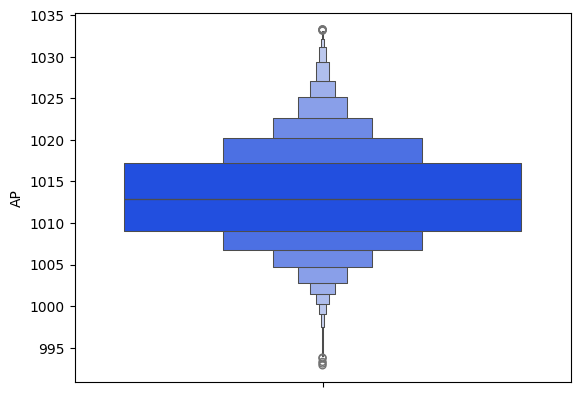

In [128]:
sns.boxenplot(data=df['AP'],palette='bright')

C:\Users\omarr\AppData\Local\Temp\ipykernel_7628\3145695435.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df['AT'],palette='bright')


<Axes: ylabel='AT'>

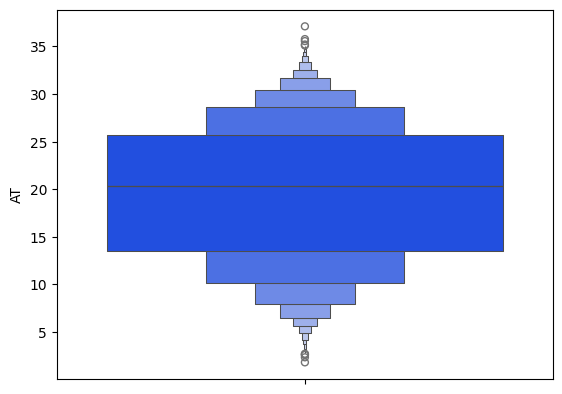

In [129]:
sns.boxenplot(data=df['AT'],palette='bright')

C:\Users\omarr\AppData\Local\Temp\ipykernel_7628\2088693133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df['V'],palette='bright')


<Axes: ylabel='V'>

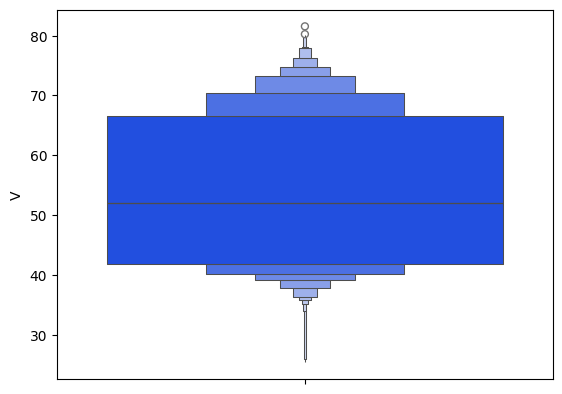

In [130]:
sns.boxenplot(data=df['V'],palette='bright')

C:\Users\omarr\AppData\Local\Temp\ipykernel_7628\4113486885.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df['RH'],palette='bright')


<Axes: ylabel='RH'>

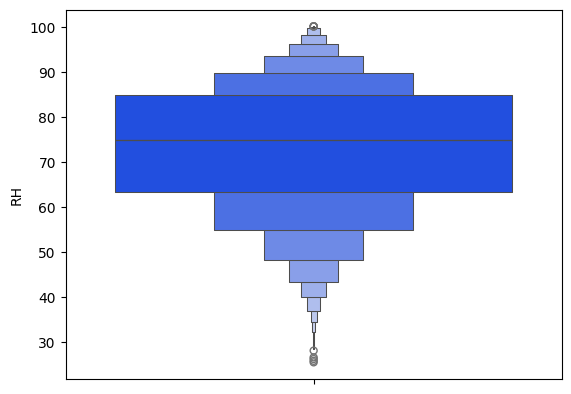

In [131]:
sns.boxenplot(data=df['RH'],palette='bright')

C:\Users\omarr\AppData\Local\Temp\ipykernel_7628\2946644109.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df['PE'],palette='bright')


<Axes: ylabel='PE'>

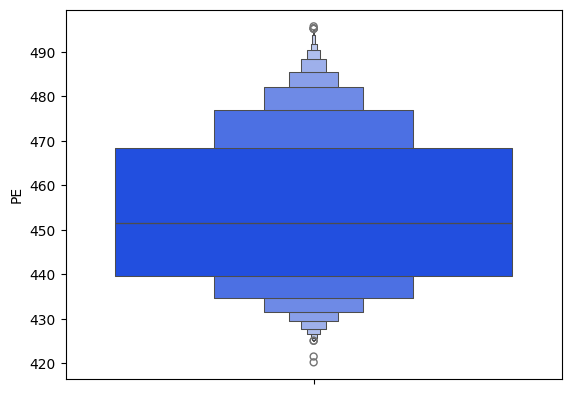

In [132]:
sns.boxenplot(data=df['PE'],palette='bright')

#### No significent outlier in our dataset.

#### Our data is rady for machin learning model

In [133]:
# importing ML library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [134]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Here AT,V,AP,RH is our independent variable and PE is dependent variable

In [135]:
X=df.drop(columns=['PE'])

In [136]:
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [137]:
X.shape

(9527, 4)

In [138]:
y.shape

(9527, 1)

In [139]:
y=df[['PE']]

In [140]:
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


#### Finding accuracy

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)


Shape of x_train: (7621, 4)
Shape of y_train: (7621, 1)
Shape of x_test: (1906, 4)
Shape of y_test: (1906, 1)


LinearRegression()

#### pradict the model

In [142]:
y_pred=model.predict(x_test)

In [143]:
print(y_pred)

[[462.51898394]
 [446.67819631]
 [447.95770234]
 ...
 [456.69453576]
 [445.20322635]
 [438.03480044]]


#### Evaluated the model

In [144]:
r2_score(y_test,y_pred)

0.9283920303369918

#### This model 92% accurate.

Text(0.5, 1.0, 'Actual_Value VS Predicted_Value')

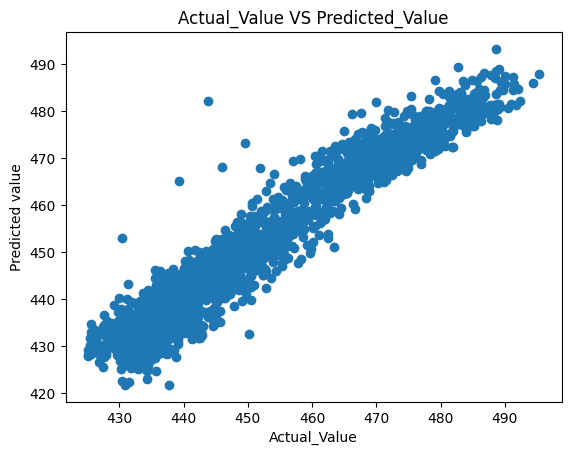

In [145]:
# Visualization of this model
plt.scatter(y_test,y_pred)
plt.xlabel('Actual_Value')
plt.ylabel('Predicted value')
plt.title("Actual_Value VS Predicted_Value")


#### Predicted Value

In [146]:





y_test = y_test.values.flatten()  # Convert to 1-dimensional array
y_pred = y_pred.flatten()  # Convert to 1-dimensional array

# Create a DataFrame with the desired columns
result_df = pd.DataFrame({'Actual_Value': y_test, 'Predicted_Value': y_pred, 'Difference': y_test - y_pred})

# Display the DataFrame
print(result_df)


      Actual_Value  Predicted_Value  Difference
0           463.57       462.518984    1.051016
1           441.31       446.678196   -5.368196
2           445.34       447.957702   -2.617702
3           465.42       467.443596   -2.023596
4           439.06       434.679907    4.380093
...            ...              ...         ...
1901        475.41       473.640271    1.769729
1902        457.50       455.313182    2.186818
1903        455.17       456.694536   -1.524536
1904        448.75       445.203226    3.546774
1905        433.59       438.034800   -4.444800

[1906 rows x 3 columns]
